# Explore here

In [50]:
# Your code here
import pandas as pd


In [51]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [52]:
total_data.shape

(48895, 16)

In [53]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Existen un total de 48.895 filas (en este caso, direcciones de Airbnb en NY) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, "Price".

Las variables "last_review" y "reviews_per_month" contienen más de 10K valores nulos (de los 48.895 comentados previamente).
Las variables "host_name" y "name" también cuentan con valores nulos, pero ambos, menos de 20. El resto de variables cuentan siempre con valor.

Los datos cuentan con 10 características numéricas y 6 características categóricas.

In [54]:
total_data.drop("id", axis = 1).duplicated().sum()

np.int64(0)

En este dataframe no hemos encontrado duplicados, por lo que no utilizaremos la función de drop_duplicates().

In [55]:
total_data.drop(["id", "name", "host_id", "host_name", "last_review"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Análisis de variables univariante

### Análisis sobre variables categóricas

In [56]:
# Agrupar por barrio y contar cuántos apartamentos hay en cada uno
top_10_neighbourhoods = total_data['neighbourhood'].value_counts().nlargest(10).index

# Filtrar el dataset para que solo tenga esos 10 barrios
filtered_data = total_data[total_data['neighbourhood'].isin(top_10_neighbourhoods)]

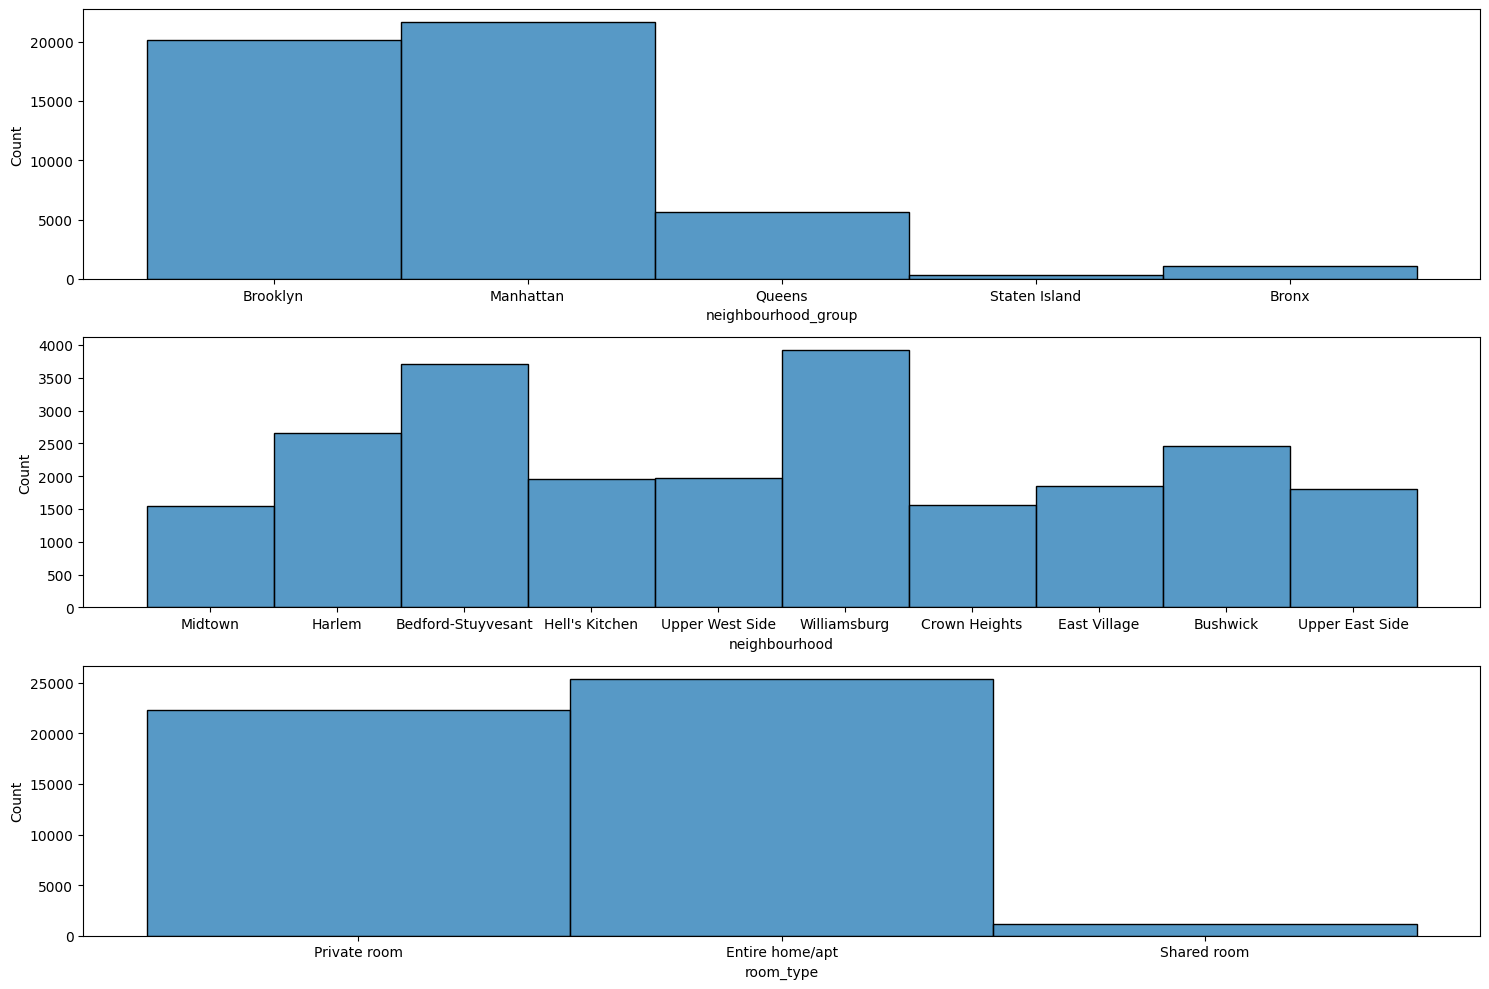

In [57]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, figsize = (15, 10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = filtered_data, x = "neighbourhood")
sns.histplot(ax = axis[2], data = total_data, x = "room_type")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [58]:
# Contar cuántos alojamientos hay por área
counts = total_data['neighbourhood_group'].value_counts()

# Calcular el porcentaje
percentages = (counts / counts.sum()) * 100

print(percentages)

neighbourhood_group
Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: count, dtype: float64


### Análisis categórico

- La mayor concentración de alojamientos disponibles se encuentra en Manhattan y Brooklyn, representando aproximadamente el 85% de la oferta total, siendo Manhattan el área con el mayor número de opciones ligeramente por encima de Brooklyn . Le siguen Queens con un 11%, el Bronx con un 2%, y finalmente Staten Island con menos del 1%.

- El barrio con más alojamientos disponibles es Williamsburg, seguido por Bedford-Stuyvesant, ambos ubicados en Brooklyn. En tercer lugar se encuentra Harlem, en el norte de Manhattan.

- Los apartamentos completos son el tipo de alojamiento más ofertado, seguidos de cerca por las habitaciones privadas. Las habitaciones compartidas, en cambio, tienen una presencia mínima en la oferta total.

### Análisis sobre variables numéricas

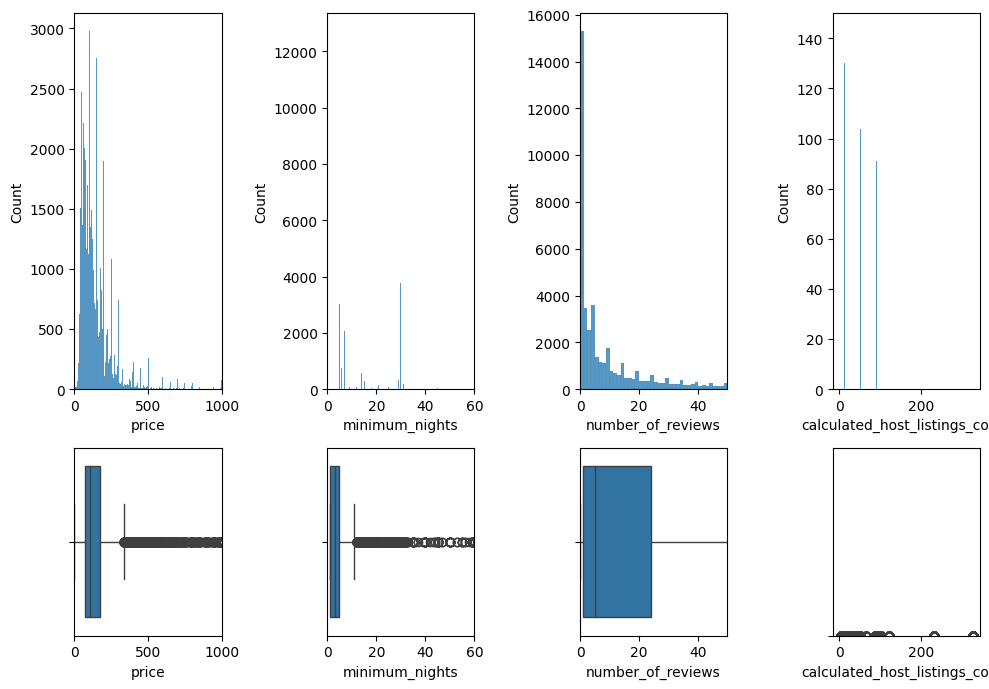

In [59]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set_xlim(0, 1000)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price").set_xlim(0, 1000)
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 60)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights").set_xlim(0, 60)
sns.histplot(ax = axis[0, 2], data = total_data, x = "number_of_reviews").set_xlim(0, 50)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "number_of_reviews").set_xlim(0, 50)
sns.histplot(ax = axis[0, 3], data = total_data, x = "calculated_host_listings_count").set_ylim(0, 150)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "calculated_host_listings_count").set_ylim(0, 150)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Análisis numérico

- Precio por noche: La mayoría de los alojamientos tienen un precio inferior a los 250 dólares por noche. Sin embargo, existen múltiples excepciones, aunque estas disminuyen considerablemente a partir de los 500 dólares, indicando que los precios más altos son mucho menos frecuentes.

- Estancia mínima: La mayoría de los apartamentos requieren una estancia mínima de entre 1 y 5 noches. No obstante, se observa un pico significativo —alrededor de 4.000 alojamientos— que exigen una estancia mínima de al menos 30 noches. A partir de este umbral, apenas hay casos que requieran estancias más largas, lo que sugiere que 30 días es un límite común en alquileres de largo plazo.

- Número de reseñas: La mayor parte de los alojamientos han recibido entre 0 y 25 reseñas, siendo especialmente común el rango de 0 a 4 reseñas. Aquellos con más de 25 reseñas son minoría, lo que indica que la mayoría de los anuncios no acumulan un alto volumen de valoraciones.

- Cantidad de alojamientos por anfitrión: La gran mayoría de los anfitriones gestionan entre 1 y 3 alojamientos (aproximadamente 130 tienen 1, 110 tienen 2 y 95 tienen 3). No obstante, existen algunos casos atípicos de anfitriones que poseen un número significativamente mayor, llegando incluso a 50, 100 o más propiedades. Algunos casos aislados tienen más de 200 propiedades.

# Análisis sobre variables multivariante

### Análisis numérico-numérico

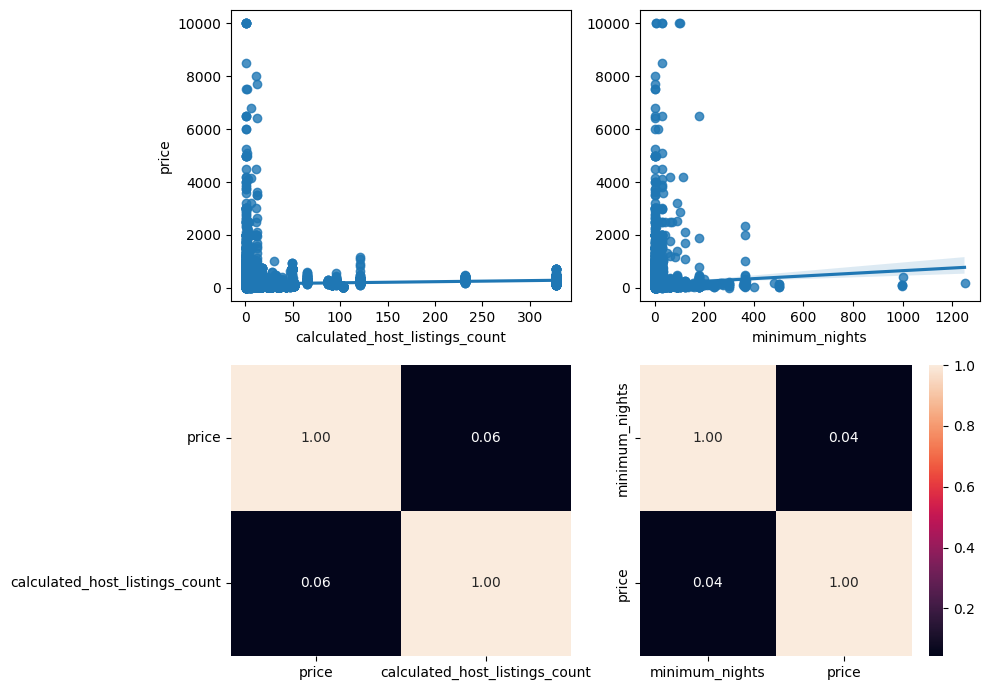

In [60]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 1], data = total_data, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(total_data[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 0], data = total_data, x = "calculated_host_listings_count", y = "price")
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No se observa una relación directa fuerte entre el precio del alojamiento y la cantidad de propiedades que posee el anfitrión. Del mismo modo, tampoco se identifica una correlación clara entre el precio y el número mínimo de noches requeridas para la estancia.

### Análisis categórico-categórico

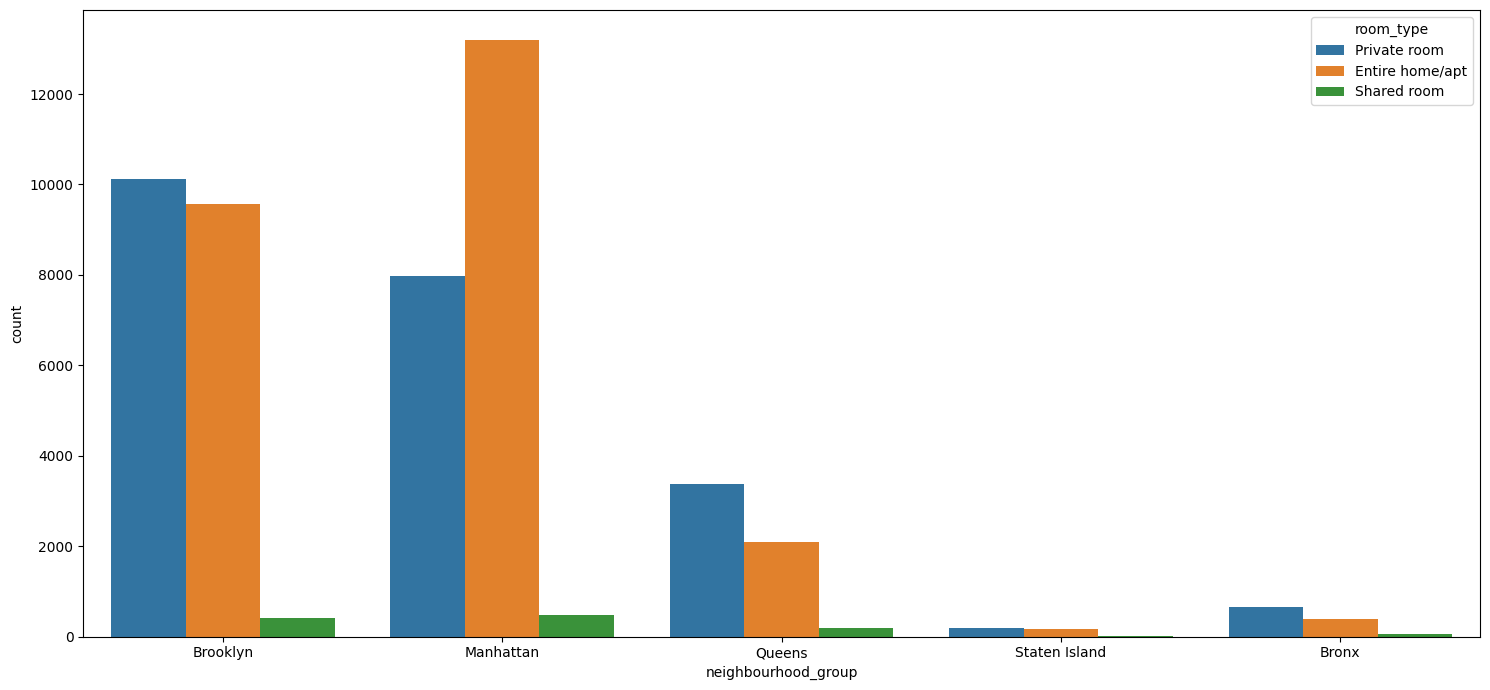

In [61]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot(data = total_data, x = "neighbourhood_group", hue = "room_type")

plt.tight_layout()

plt.show()

A partir del gráfico anterior se pueden extraer las siguientes conclusiones:

- Concentración geográfica: La mayoría de los alojamientos disponibles se concentran en Manhattan y Brooklyn, que en conjunto superan el 85% de la oferta total. Les siguen, en menor proporción, Queens, Bronx y Staten Island.

- Tipo de alojamiento por distrito: Manhattan es la única zona donde predominan los apartamentos enteros como tipo de alojamiento principal. En Brooklyn, Queens y Bronx, las habitaciones privadas superan ligeramente a los apartamentos enteros en disponibilidad.

- Habitaciones compartidas: Este tipo de alojamiento representa, con diferencia, la menor proporción en todas las áreas. 

### Combinaciones de la clase con varias predictoras

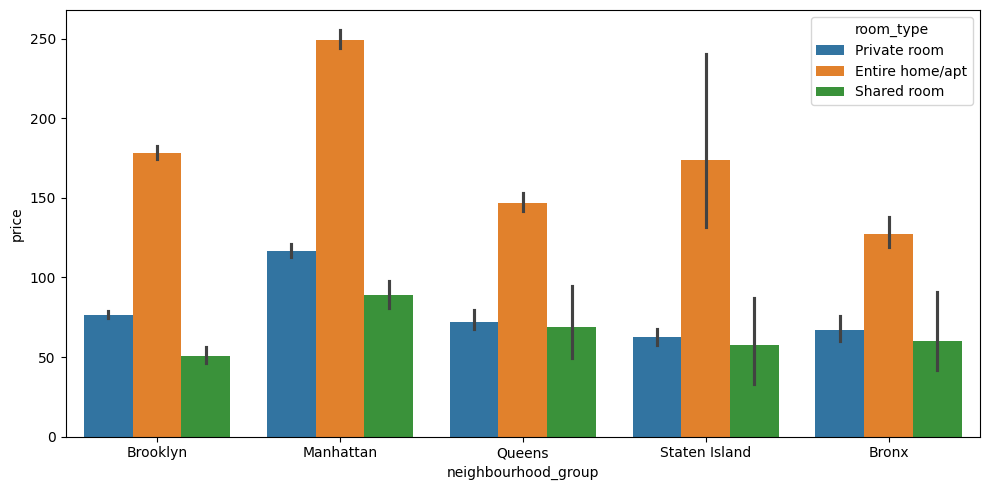

In [62]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)

sns.barplot(data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.tight_layout()

plt.show()

Del análisis del gráfico anterior se observa que, independientemente de la zona, los apartamentos completos son los alojamientos más caros, seguidos de las habitaciones privadas y, por último, las habitaciones compartidas.
Curiosamente, en Manhattan y Brooklyn las habitaciones privadas tienen un precio significativamente más alto que las habitaciones compartidas. Sin embargo, en Queens, Staten Island y el Bronx, los precios de ambos tipos de alojamiento están casi a la par, con una diferencia inferior a 10 dólares.


### Análisis de correlaciones

In [63]:
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data[["neighbourhood_group_n", "neighbourhood_group"]]

,neighbourhood_group_n,neighbourhood_group
0,0,Brooklyn
1,1,Manhattan
2,1,Manhattan
3,0,Brooklyn
4,1,Manhattan
...,...,...
48890,0,Brooklyn
48891,0,Brooklyn
48892,1,Manhattan
48893,1,Manhattan


In [64]:
neighbourhood_group_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for index, row in total_data[["neighbourhood_group_n", "neighbourhood_group"]].drop_duplicates().iterrows()}
print(neighbourhood_group_rules)

import json

# Escritura
with open("./neighbourhood_group_rules.json", "w") as f:
  json.dump(neighbourhood_group_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./neighbourhood_group_rules.json", "r") as f:
  neighbourhood_group_rules = json.load(f)
print("2", neighbourhood_group_rules)

total_data["neighbourhood_group_n"] = total_data["neighbourhood_group"].apply(lambda x: neighbourhood_group_rules[x])
total_data

{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}
2 {'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,1


In [65]:
#neighbourhood
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]
total_data[["neighbourhood_n", "neighbourhood"]]

,neighbourhood_n,neighbourhood
0,0,Kensington
1,1,Midtown
2,2,Harlem
3,3,Clinton Hill
4,4,East Harlem
...,...,...
48890,6,Bedford-Stuyvesant
48891,21,Bushwick
48892,2,Harlem
48893,7,Hell's Kitchen


In [66]:
neighbourhood_rules = {row["neighbourhood"]: row["neighbourhood_n"] for index, row in total_data[["neighbourhood_n", "neighbourhood"]].drop_duplicates().iterrows()}
print(neighbourhood_rules)

import json

# Escritura
with open("./neighbourhood_rules.json", "w") as f:
  json.dump(neighbourhood_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./neighbourhood_rules.json", "r") as f:
  neighbourhood_rules = json.load(f)
print("2", neighbourhood_rules)

total_data["neighbourhood_n"] = total_data["neighbourhood"].apply(lambda x: neighbourhood_rules[x])
total_data

{'Kensington': 0, 'Midtown': 1, 'Harlem': 2, 'Clinton Hill': 3, 'East Harlem': 4, 'Murray Hill': 5, 'Bedford-Stuyvesant': 6, "Hell's Kitchen": 7, 'Upper West Side': 8, 'Chinatown': 9, 'South Slope': 10, 'West Village': 11, 'Williamsburg': 12, 'Fort Greene': 13, 'Chelsea': 14, 'Crown Heights': 15, 'Park Slope': 16, 'Windsor Terrace': 17, 'Inwood': 18, 'East Village': 19, 'Greenpoint': 20, 'Bushwick': 21, 'Flatbush': 22, 'Lower East Side': 23, 'Prospect-Lefferts Gardens': 24, 'Long Island City': 25, 'Kips Bay': 26, 'SoHo': 27, 'Upper East Side': 28, 'Prospect Heights': 29, 'Washington Heights': 30, 'Woodside': 31, 'Brooklyn Heights': 32, 'Carroll Gardens': 33, 'Gowanus': 34, 'Flatlands': 35, 'Cobble Hill': 36, 'Flushing': 37, 'Boerum Hill': 38, 'Sunnyside': 39, 'DUMBO': 40, 'St. George': 41, 'Highbridge': 42, 'Financial District': 43, 'Ridgewood': 44, 'Morningside Heights': 45, 'Jamaica': 46, 'Middle Village': 47, 'NoHo': 48, 'Ditmars Steinway': 49, 'Flatiron District': 50, 'Roosevelt Is

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0,3
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0,6
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0,21
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,1,2
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,1,7


In [67]:
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data[["room_type_n", "room_type"]]

,room_type_n,room_type
0,0,Private room
1,1,Entire home/apt
2,0,Private room
3,1,Entire home/apt
4,1,Entire home/apt
...,...,...
48890,0,Private room
48891,0,Private room
48892,1,Entire home/apt
48893,2,Shared room


In [68]:
room_type_rules = {row["room_type"]: row["room_type_n"] for index, row in total_data[["room_type_n", "room_type"]].drop_duplicates().iterrows()}
print(room_type_rules)

import json

# Escritura
with open("./room_type_rules.json", "w") as f:
  json.dump(room_type_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./room_type_rules.json", "r") as f:
  room_type_rules = json.load(f)
print("2", room_type_rules)

total_data["room_type_n"] = total_data["room_type"].apply(lambda x: room_type_rules[x])
total_data

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}
2 {'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0,6,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0,21,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,1,2,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,1,7,2


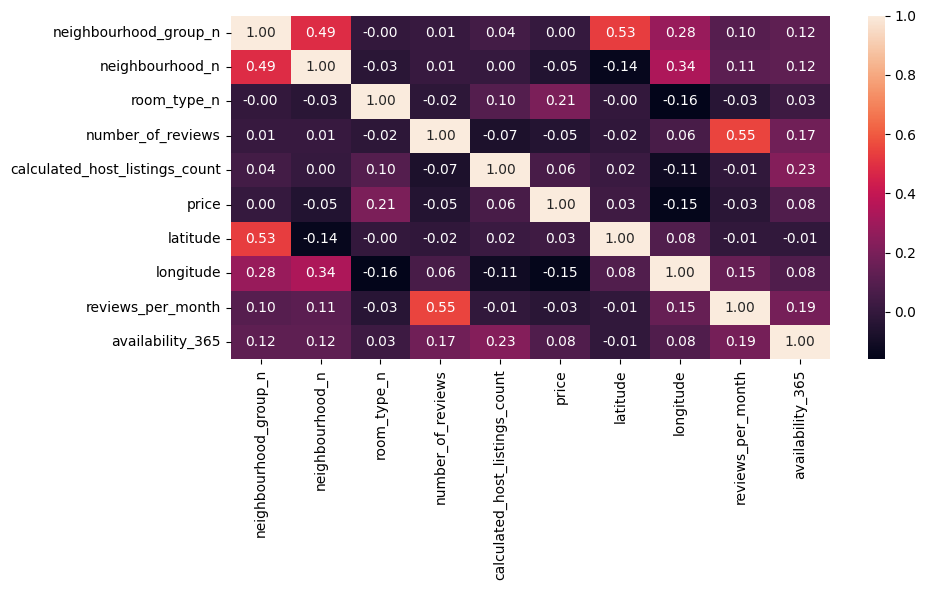

In [69]:
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "number_of_reviews", "calculated_host_listings_count", "price", "latitude", "longitude", "reviews_per_month", "availability_365"  ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

CONCLUSIONES .....

En el gráfico anterior las variables que tienen relación son el precio con el tipo de alojamiento. Y el tipo de alojamiento con el número de alojamientos que tiene un mismo dueño.

### Análisis numérico-categórico (completo)

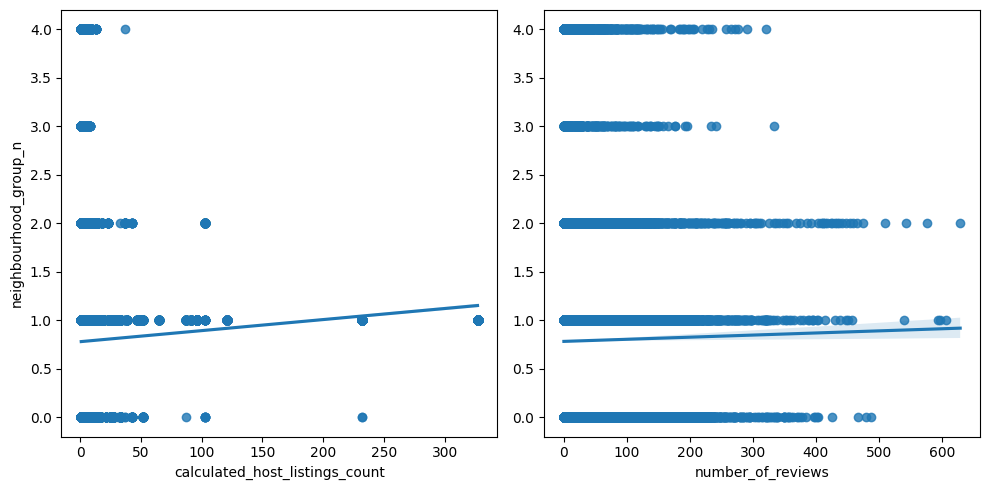

In [70]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = total_data, x = "calculated_host_listings_count", y = "neighbourhood_group_n")
sns.regplot(ax = axis[1], data = total_data, x = "number_of_reviews", y = "neighbourhood_group_n").set(ylabel = None)

plt.tight_layout()

plt.show()

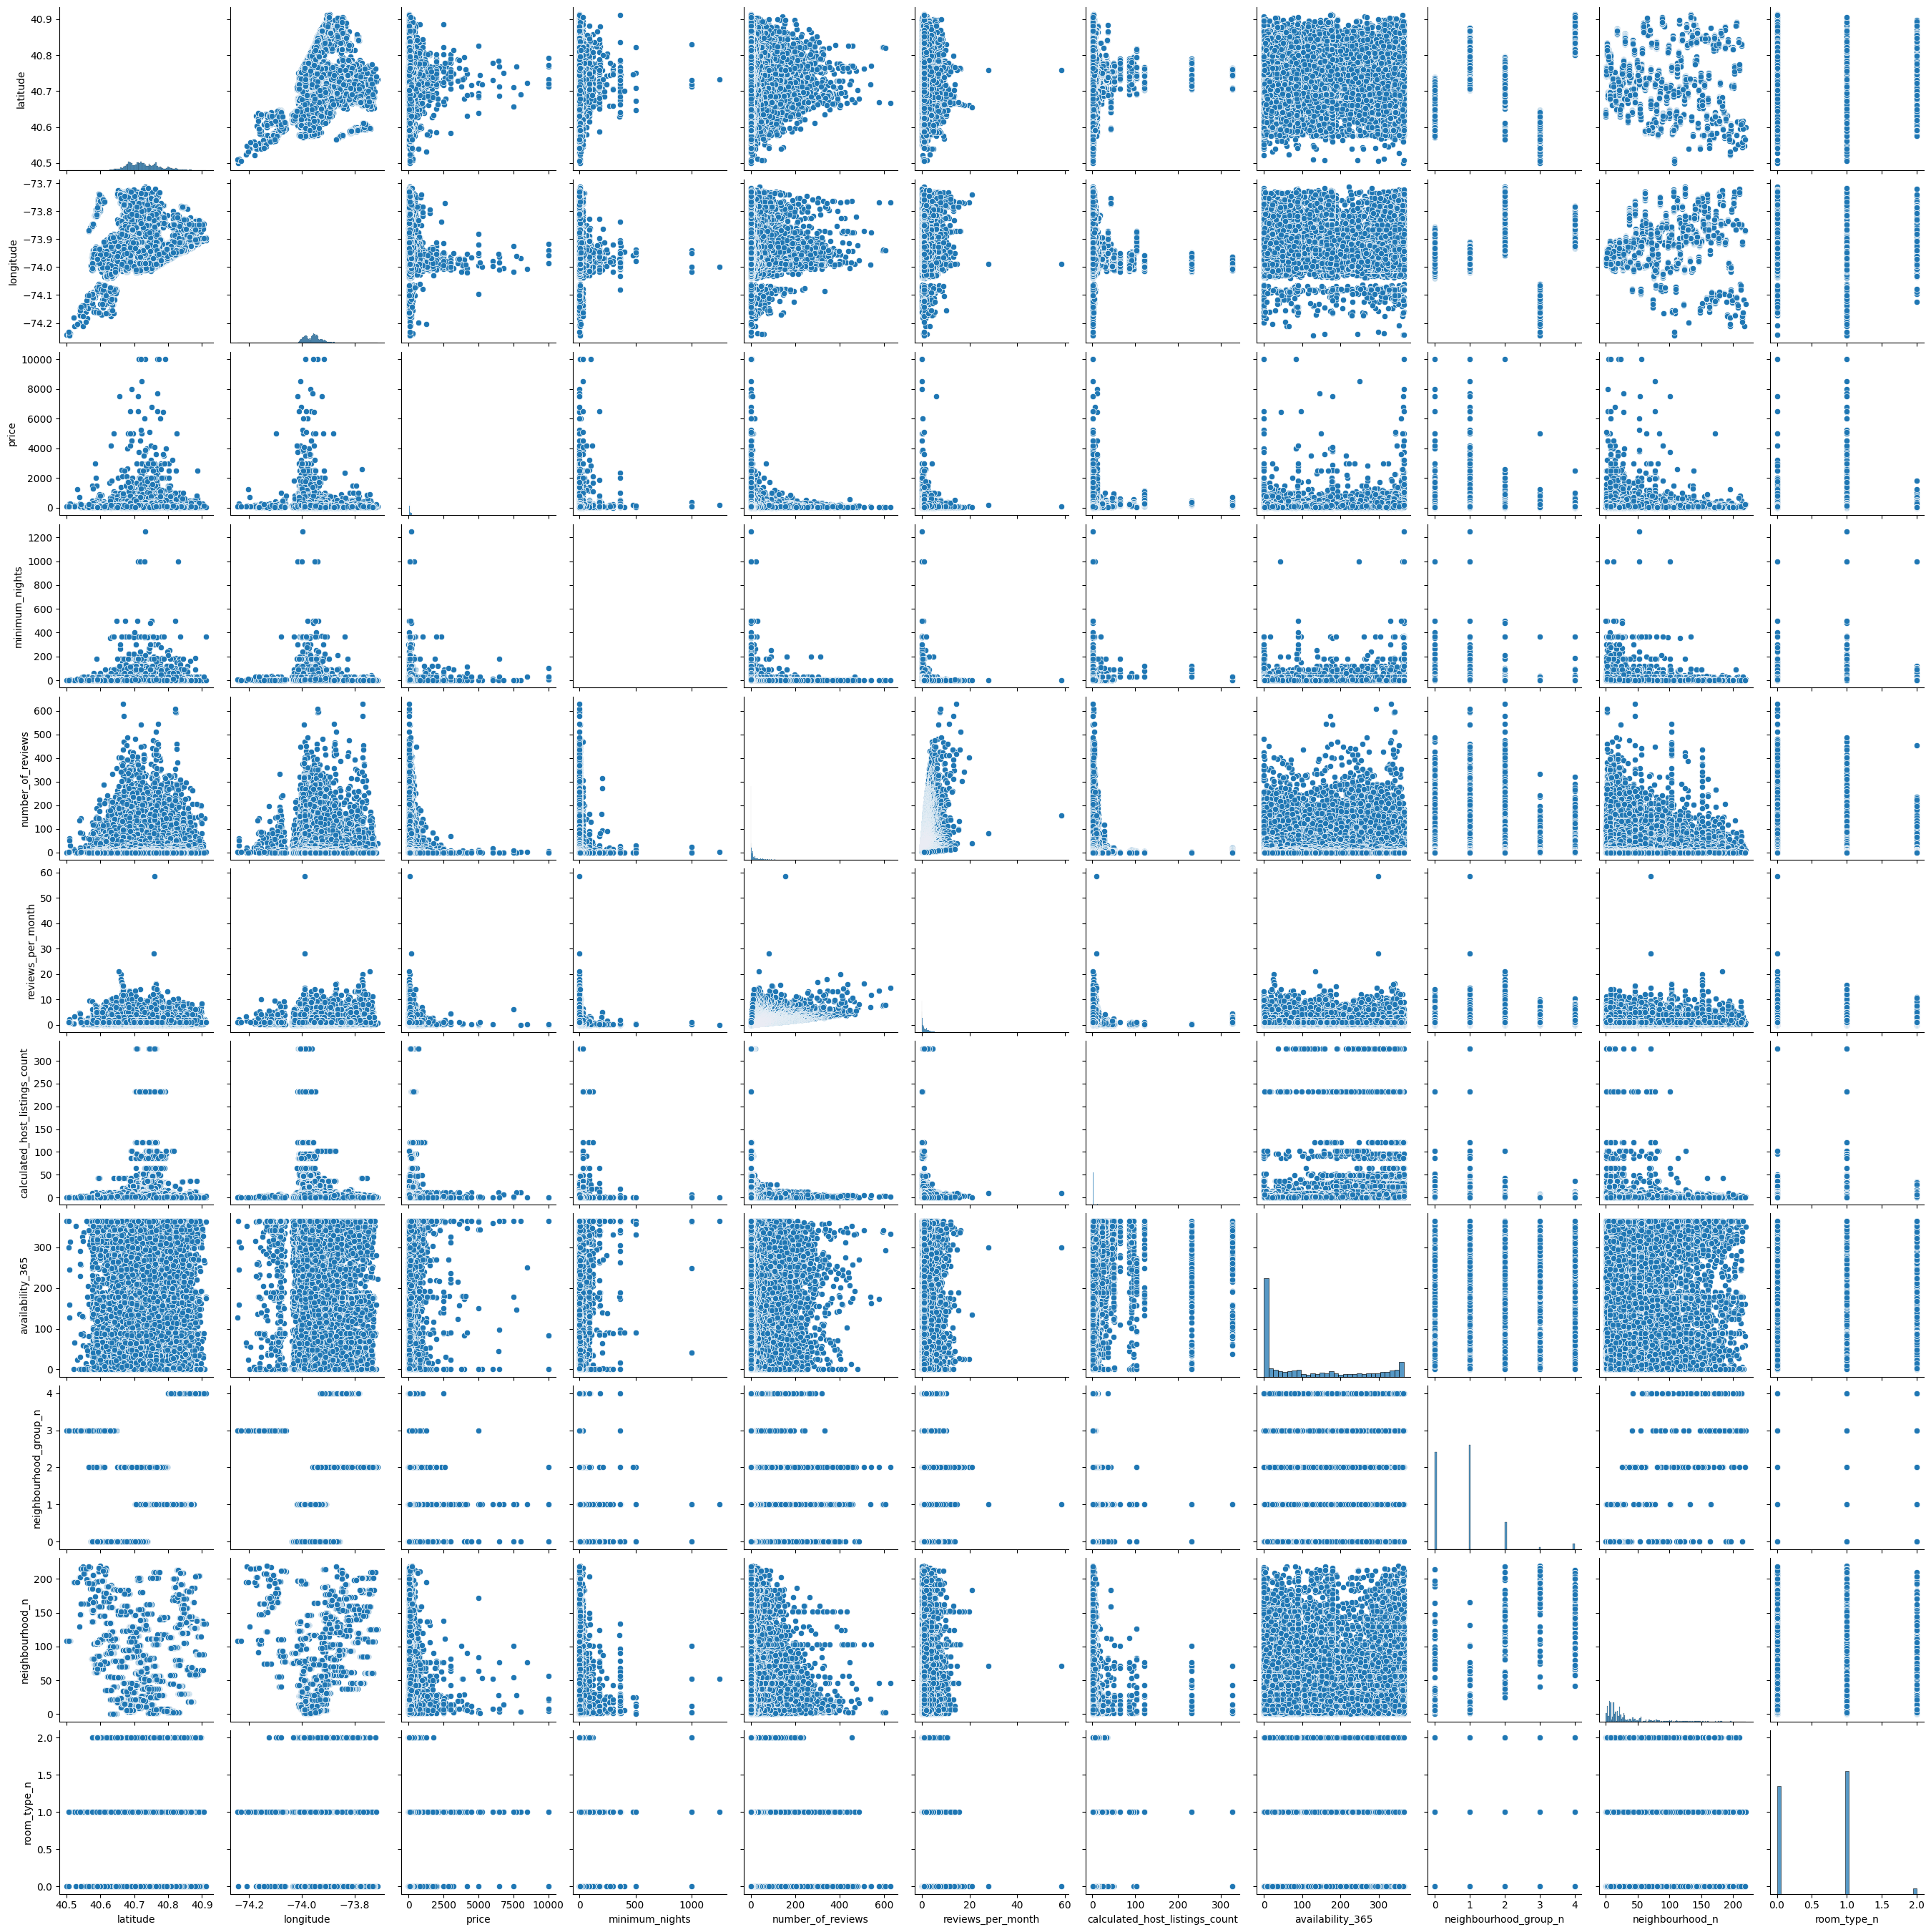

In [71]:
sns.pairplot(data = total_data)

## Ingeniería de características

In [72]:
total_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.786911,29.888782,0.567113
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.844386,34.676634,0.541249
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,7.500000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,19.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,37.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,220.000000,2.000000


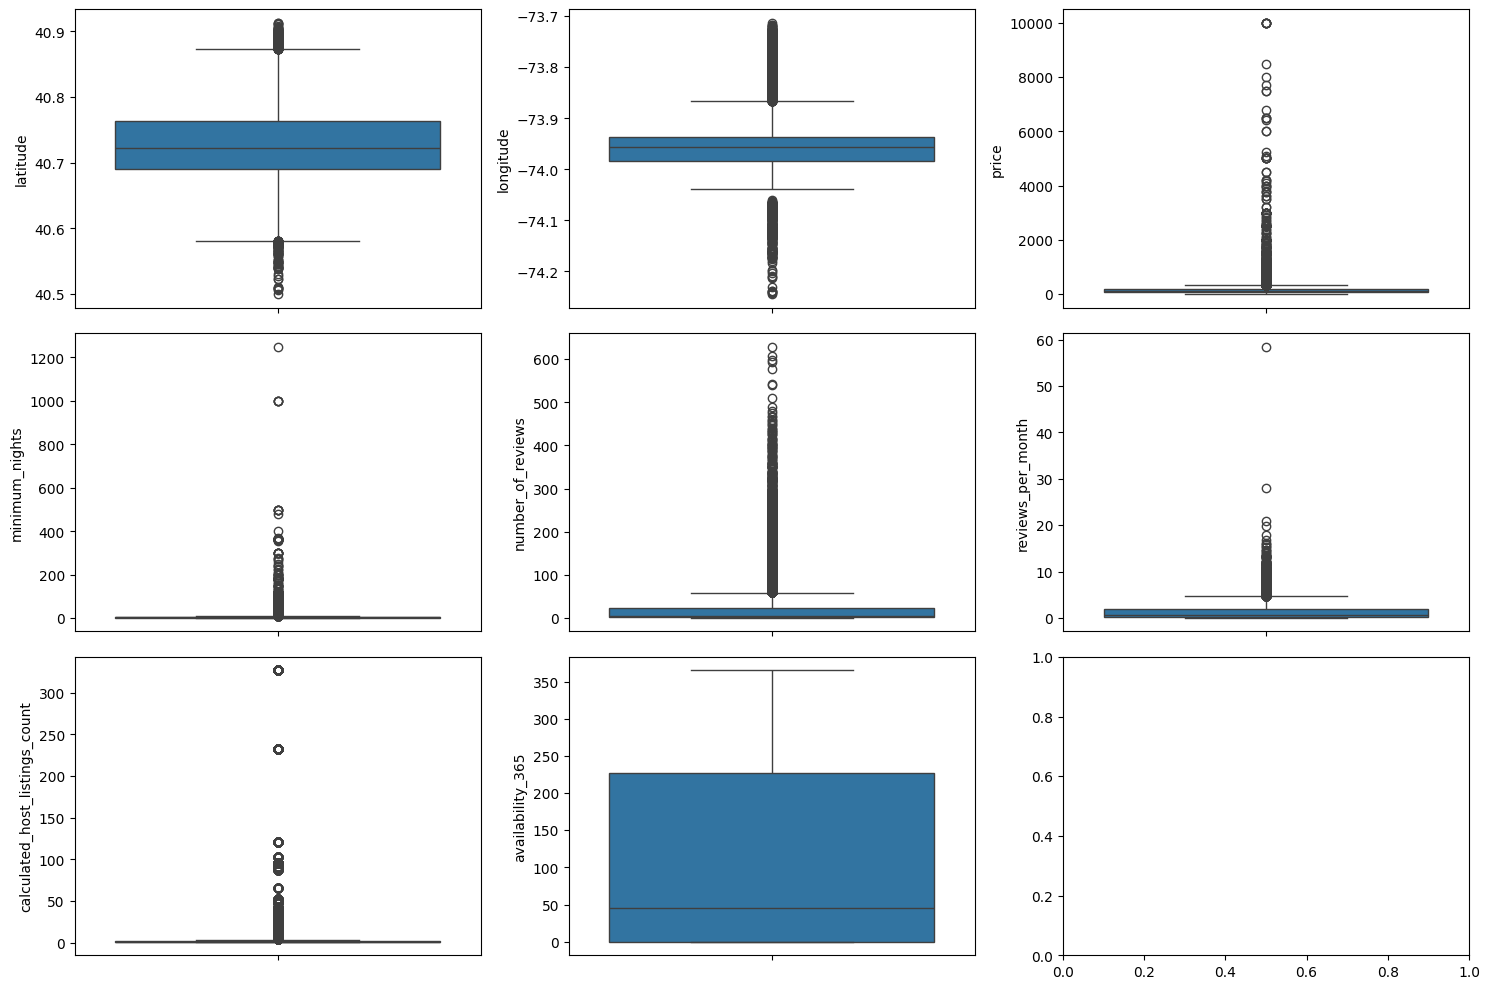

In [73]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "latitude")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "longitude")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "availability_365")


plt.tight_layout()

plt.show()

In [74]:
numerical_columns =["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

for column in numerical_columns:
    fare_stats = total_data[column].describe()
    fare_iqr = fare_stats["75%"] - fare_stats["25%"]
    upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
    lower_limit = fare_stats["25%"] - 1.5 * fare_iqr
    if lower_limit < 0:
        lower_limit = 0

        print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y 0, con un rango intercuartílico de 106.0
Los límites superior e inferior para la búsqueda de outliers son 11.0 y 0, con un rango intercuartílico de 4.0
Los límites superior e inferior para la búsqueda de outliers son 58.5 y 0, con un rango intercuartílico de 23.0
Los límites superior e inferior para la búsqueda de outliers son 4.77 y 0, con un rango intercuartílico de 1.83
Los límites superior e inferior para la búsqueda de outliers son 3.5 y 0, con un rango intercuartílico de 1.0
Los límites superior e inferior para la búsqueda de outliers son 567.5 y 0, con un rango intercuartílico de 227.0


In [75]:
# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ESTO SIGNIFICA:

total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'minimum_nights': [1, np.float64(11.0)],
 'number_of_reviews': [0, np.float64(58.5)],
 'reviews_per_month': [0.01, np.float64(4.765000000000001)],
 'calculated_host_listings_count': [1, np.float64(3.5)]}

In [76]:
total_data_CON_outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0,6,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0,21,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,1,2,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,1,7,2


In [77]:
total_data_SIN_outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9.0,0.210,3.5,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45.0,0.380,2.0,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0.0,4.765,1.0,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1.0,58.5,4.640,1.0,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9.0,0.100,1.0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2.0,0.0,4.765,2.0,9,0,6,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4.0,0.0,4.765,2.0,36,0,21,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10.0,0.0,4.765,1.0,27,1,2,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1.0,0.0,4.765,3.5,2,1,7,2


In [78]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
neighbourhood                         0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
neighbourhood_group_n                 0
neighbourhood_n                       0
room_type_n                           0
dtype: int64

In [79]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64

In [80]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

reviews_per_month                 0.205583
neighbourhood_group               0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
neighbourhood                     0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
neighbourhood_group_n             0.000000
neighbourhood_n                   0.000000
room_type_n                       0.000000
dtype: float64

In [81]:
total_data["reviews_per_month"].fillna(total_data["reviews_per_month"].mean(), inplace = True)

total_data.isnull().sum()

/tmp/ipykernel_559/3661572199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data["reviews_per_month"].fillna(total_data["reviews_per_month"].mean(), inplace = True)


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64